<a href="https://colab.research.google.com/github/rishisg/ChatGPT/blob/main/EMBEDDING_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec, FastText
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
df = pd.read_csv('twitter_training.csv', header=None, names=['ID', 'Game', 'Sentiment', 'Text'])
df.head()

,ID,Game,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [9]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')  # Explicitly download the missing resource

# Load the dataset
df = pd.read_csv('twitter_training.csv', header=None, names=['ID', 'Game', 'Sentiment', 'Text'])

# Handle missing values in the 'Text' column
df = df.dropna(subset=['Text'])  # Option 1: Drop rows with missing values
# df['Text'] = df['Text'].fillna('')  # Option 2: Fill missing values with an empty string

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply preprocessing to the dataset
df['Processed_Text'] = df['Text'].apply(preprocess_text)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,ID,Game,Sentiment,Text,Processed_Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,"[im, getting, borderlands, murder]"
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,"[coming, borders, kill]"
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,"[im, getting, borderlands, kill]"
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"[im, coming, borderlands, murder]"
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"[im, getting, borderlands, murder]"


In [10]:
# Convert processed text back to strings for CountVectorizer
df['Processed_Text_Str'] = df['Processed_Text'].apply(lambda x: ' '.join(x))

# Create BoW representation
vectorizer = CountVectorizer(max_features=1000)  # Limit to top 1000 words
bow_matrix = vectorizer.fit_transform(df['Processed_Text_Str'])

# Convert to DataFrame for visualization
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
bow_df.head()

,able,absolute,absolutely,access,account,accounts,achievement,action,activision,actual,...,years,yes,yesterday,yet,yo,youre,youtu,youtube,youtubecom,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Sparsity of BoW Matrix: 0.9938


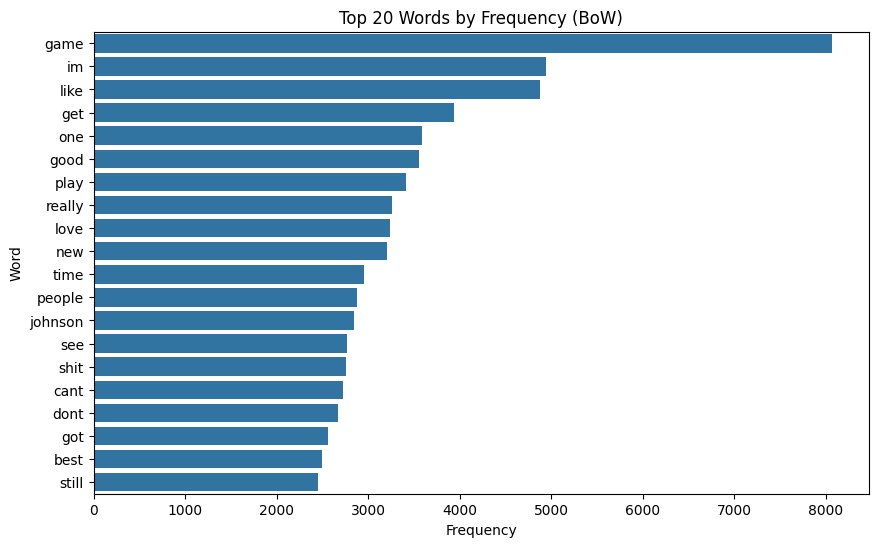

In [11]:
# Check sparsity
sparsity = 1 - (bow_matrix.nnz / (bow_matrix.shape[0] * bow_matrix.shape[1]))
print(f"Sparsity of BoW Matrix: {sparsity:.4f}")

# Visualize word frequencies
word_frequencies = bow_matrix.sum(axis=0).A1
word_freq_df = pd.DataFrame({'Word': vectorizer.get_feature_names_out(), 'Frequency': word_frequencies})
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)

# Plot top 20 words
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df)
plt.title('Top 20 Words by Frequency (BoW)')
plt.show()

In [12]:
# Create TF-IDF representation
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limit to top 1000 words
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Text_Str'])

# Convert to DataFrame for visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.head()

,able,absolute,absolutely,access,account,accounts,achievement,action,activision,actual,...,years,yes,yesterday,yet,yo,youre,youtu,youtube,youtubecom,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


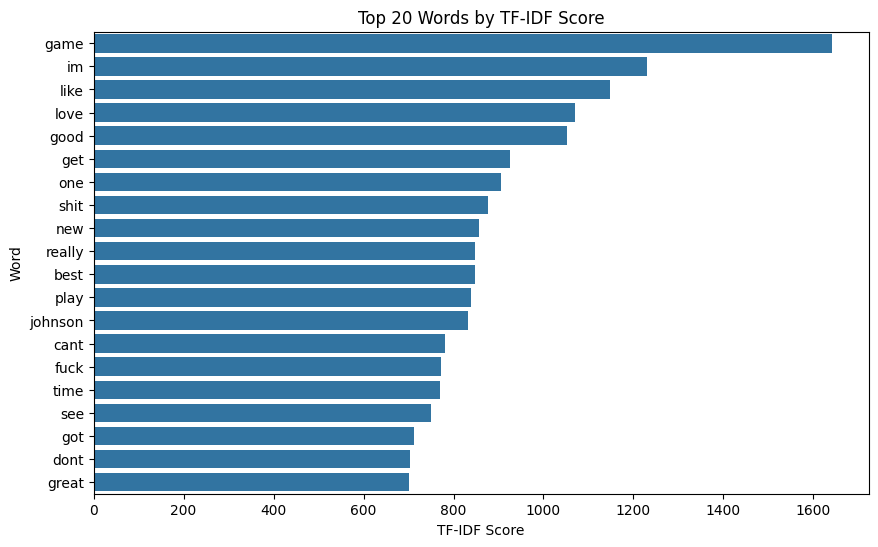

In [13]:
# Visualize top TF-IDF scores
tfidf_scores = tfidf_matrix.sum(axis=0).A1
tfidf_score_df = pd.DataFrame({'Word': tfidf_vectorizer.get_feature_names_out(), 'TF-IDF Score': tfidf_scores})
tfidf_score_df = tfidf_score_df.sort_values(by='TF-IDF Score', ascending=False).head(20)

# Plot top 20 words by TF-IDF score
plt.figure(figsize=(10, 6))
sns.barplot(x='TF-IDF Score', y='Word', data=tfidf_score_df)
plt.title('Top 20 Words by TF-IDF Score')
plt.show()

In [14]:
# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df['Processed_Text'], vector_size=100, window=5, min_count=1, workers=4)

# Save the model
word2vec_model.save("word2vec.model")

Vector for 'game': [ 0.1987205  -0.13007823 -1.7386749   0.5821083  -0.7311601  -1.3894172
  0.9656795   2.2799034  -1.9259156   0.62031835 -0.80943465 -0.78788346
  0.72244805  0.43280008 -0.8760477  -1.5729681  -0.59237564 -0.8206926
 -2.1813357  -0.42462516  2.2730703   1.7814795   2.1632411  -0.5679399
  0.13888437 -0.49185318 -0.95515114  0.5683741  -0.7775591  -0.44819644
 -0.73622674 -0.79924786  0.40609592 -0.65947896 -1.358464   -0.52793527
 -0.3225962  -0.78999794 -0.05809485  0.16038603 -0.4755786  -0.07647423
 -0.31032756  1.2104908  -0.05564647 -0.04338696 -2.1329563  -0.26232335
  0.31232196  0.05341338  0.29127833 -1.5338238   0.01746967 -1.0446029
  1.5231439  -1.9271722   1.335681   -2.0659068   0.04021472  0.5046122
 -1.1983625  -0.34725717  0.35466656 -0.2600641  -0.94928056  1.4023714
 -1.0327588   0.637793   -0.83203334 -0.4377089  -0.5289511   0.51607746
  0.9063552  -1.3211515  -0.03358403  0.6587228   1.0324658  -0.4563561
 -0.24287601 -0.26200673 -1.2127216   1

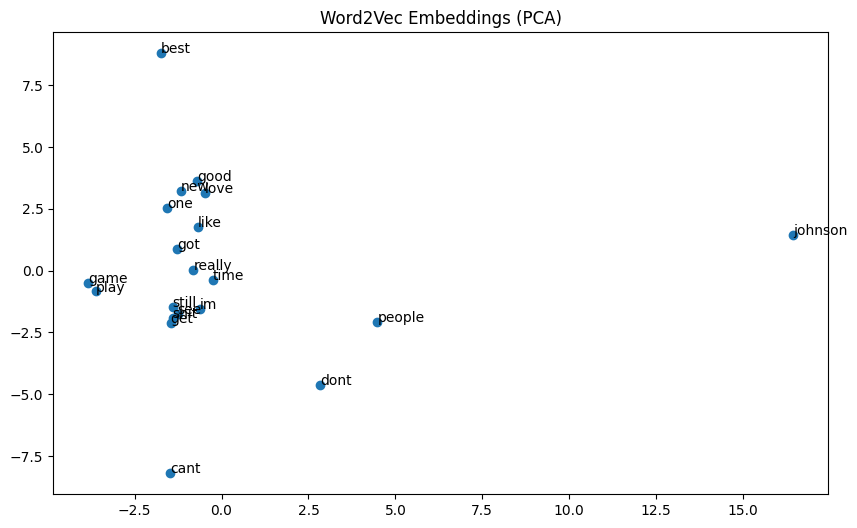

In [15]:
# Get word vectors
word_vectors = word2vec_model.wv

# Example: Get vector for a specific word
vector = word_vectors['game']
print(f"Vector for 'game': {vector}")

# Visualize word embeddings (e.g., using PCA)
from sklearn.decomposition import PCA

# Get vectors for top 20 words
words = word_freq_df['Word'].tolist()
vectors = [word_vectors[word] for word in words]

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))
plt.title('Word2Vec Embeddings (PCA)')
plt.show()

In [16]:
# Load pre-trained GloVe embeddings
glove_embeddings = {}
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = vector

# Example: Get GloVe vector for a specific word
vector = glove_embeddings.get('game', np.zeros(100))
print(f"GloVe Vector for 'game': {vector}")

GloVe Vector for 'game': [ 0.062659  0.026003  1.122    -0.84123  -0.56907   0.86677   0.99235
 -0.19032  -0.74226  -0.29547   0.037746 -0.71756  -0.44891  -0.65801
  0.17469   0.50347   0.21268   1.0438   -0.60034   0.48838   0.16955
 -0.070132 -0.070228  0.50193   1.3543   -0.27193  -0.16449   0.37399
 -0.14291   0.19646  -0.80925   0.86245  -0.2118   -0.074321  0.38522
 -0.34137  -1.2694    0.59967  -0.84746  -0.68818   0.68874  -0.19769
  0.2064   -0.20387  -0.33651   0.093972  0.34192  -0.68139   0.61451
 -0.88127  -0.13401  -0.088989 -0.098916  0.73405   0.33496  -3.1068
 -0.22643  -0.21568   1.3375    1.5472   -1.2343    0.42964  -0.78932
 -0.027462  0.34738   0.17338   0.24975  -0.010451 -0.71149   0.55568
 -0.20869   0.074445  0.29833  -0.029668 -0.01595   0.46368  -0.80873
  0.11564  -0.14607   0.73785   0.33548   0.18176  -1.2688    0.21146
 -1.5877    0.10299  -0.55312  -0.12812  -0.035095  0.12023  -0.40742
  0.21107  -0.4187    0.12999  -0.16549  -0.55023  -0.61101   0.46

In [17]:
# Train FastText model
fasttext_model = FastText(sentences=df['Processed_Text'], vector_size=100, window=5, min_count=1, workers=4)

# Save the model
fasttext_model.save("fasttext.model")

FastText Vector for 'game': [ 0.8929836  -1.3410776  -1.5073794   1.8295064   1.1454523  -0.07443251
 -2.0653543   0.8920799   1.9907438  -0.09934299 -0.45242804 -1.0599751
 -0.7479454   0.08600874  1.8824539  -1.5846851  -0.54329586 -0.8152927
  0.15481478 -1.1537642  -0.5697488  -2.0677886  -0.5630764  -1.2163162
  2.4370832  -0.68449676  1.2711339  -0.2696176  -0.55176234  0.60287774
 -0.22367477 -1.9900187  -0.4823903   1.005362   -2.414384    0.5557558
 -0.19631095 -0.27813175  0.3170746  -0.1830032  -0.9742841  -1.1108017
  0.6127901  -1.8524102  -0.50274754  0.14587244  2.1290338   1.3538737
  0.58546966  0.20854177  0.21191289  1.2413765   0.10191289 -1.8988067
 -2.16923    -0.25304788 -0.9486589  -0.9573494  -1.7327263  -1.6862599
 -1.6304706  -0.5606854  -1.3390589  -2.6651595   0.5864785   2.8826194
 -1.1165535  -1.910936   -0.04063058 -0.41345498 -0.1603809  -2.1980226
  2.076037   -2.3367462  -0.16089314  0.3338315   2.9198463  -1.0249158
 -0.922133    1.4816035  -1.018443

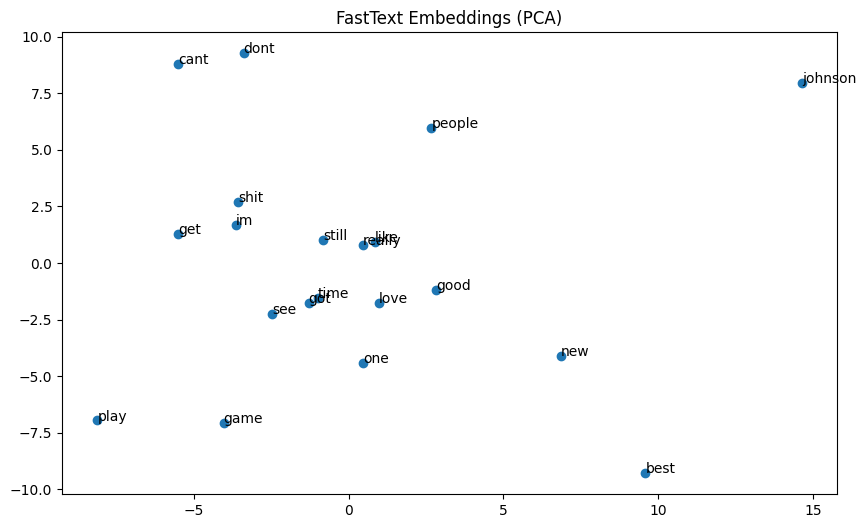

In [18]:
# Get word vectors
fasttext_vectors = fasttext_model.wv

# Example: Get vector for a specific word
vector = fasttext_vectors['game']
print(f"FastText Vector for 'game': {vector}")

# Visualize word embeddings (e.g., using PCA)
vectors = [fasttext_vectors[word] for word in words]
vectors_2d = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))
plt.title('FastText Embeddings (PCA)')
plt.show()